In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [27]:
matplotlib.rcParams.update({'font.size': 25})

In [28]:
loss_df = pd.read_csv(r"data/nes_tmr_loss.csv")

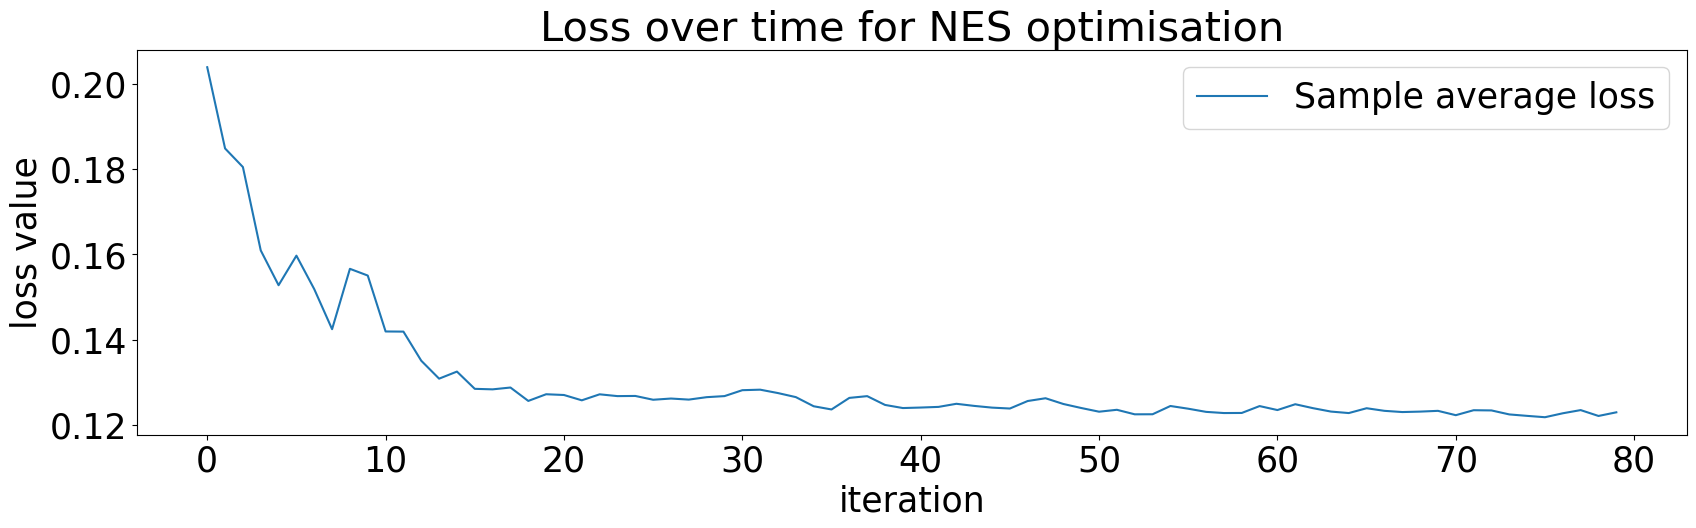

In [29]:
plt.figure(figsize=(20,5))
# plt.plot(loss_df["mean_loss"], label="Mean loss")
plt.plot(loss_df["avg_loss"], label="Sample average loss")
# plt.plot(loss_df["min_loss"], label="Sample minimum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()